In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Lokesh\OneDrive\Desktop\AMRITA\ML_PRAC\Loan_default.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (255347, 18)


<Axes: ylabel='Income'>

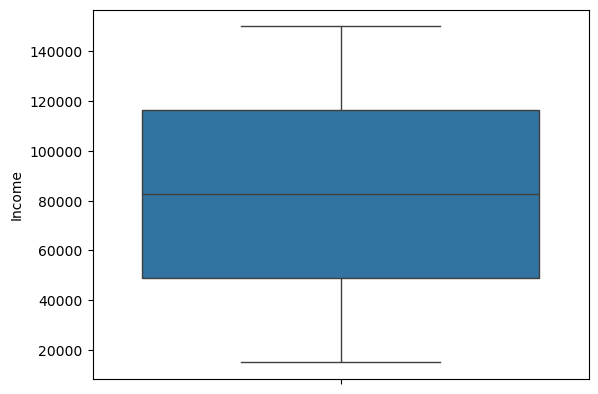

In [5]:
sns.boxplot(df['Income'])

<Axes: ylabel='LoanAmount'>

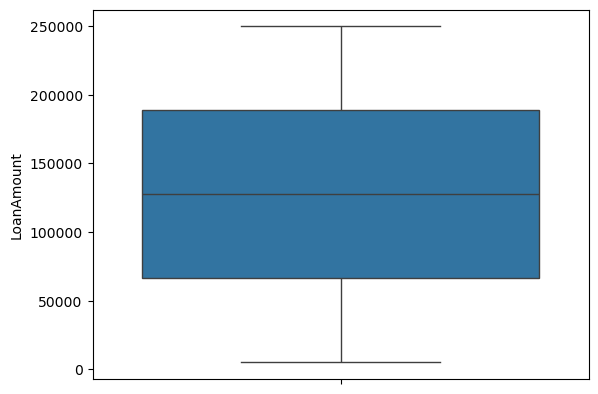

In [6]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='CreditScore'>

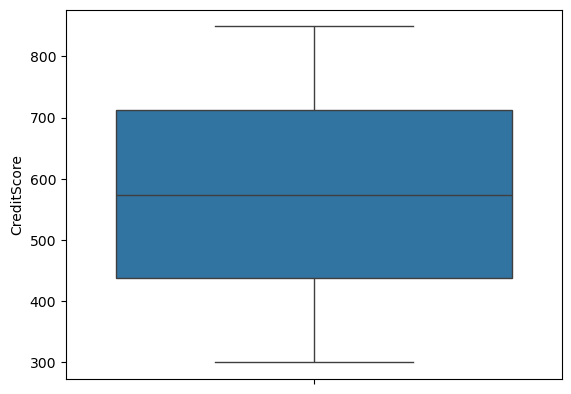

In [7]:
sns.boxplot(df['CreditScore'])
##No oulier detected

In [8]:
###CHECK FOR THE MISSING VALUES IN THE DATASET
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []


In [10]:
##Encode the categorical data
dfnew=df.copy()
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
ord1.fit([dfnew['Education']])
dfnew['Education'] = ord1.fit_transform(dfnew[['Education']])

In [11]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  float64
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [12]:
##Used label encoding since one hot leads to memory error
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in dfnew.columns:
    if dfnew[col].dtype=='object':
        dfnew[col]=label_encoder.fit_transform(dfnew[col])

In [13]:
dfnew.shape

(255347, 18)

In [14]:
dfnew.drop(columns='LoanID',inplace=True)
dfnew.sample(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
124081,60,89562,21200,752,48,3,24.30,60,0.54,2.0,3,0,1,0,3,0,0
172326,60,104592,188753,443,50,2,17.42,48,0.32,2.0,0,0,0,0,0,1,0
227488,60,42982,32321,343,61,4,2.03,48,0.34,0.0,0,2,1,0,3,1,0
146500,30,113740,193901,444,8,4,14.21,12,0.68,3.0,3,1,0,1,4,0,1
221353,55,18935,166658,651,47,1,7.16,36,0.37,1.0,0,0,0,0,3,0,0
186723,58,41304,169443,491,40,2,10.60,48,0.53,0.0,0,0,1,0,1,0,0
55284,42,88161,52627,700,73,3,22.06,36,0.33,0.0,2,1,0,1,4,0,0
26495,67,142907,189199,337,115,2,15.62,60,0.42,0.0,3,1,0,0,3,0,0
3887,22,81221,87329,736,57,4,12.74,36,0.60,0.0,1,0,0,0,1,0,1
246427,20,119694,249304,624,32,1,9.97,60,0.73,0.0,2,0,1,1,3,0,0


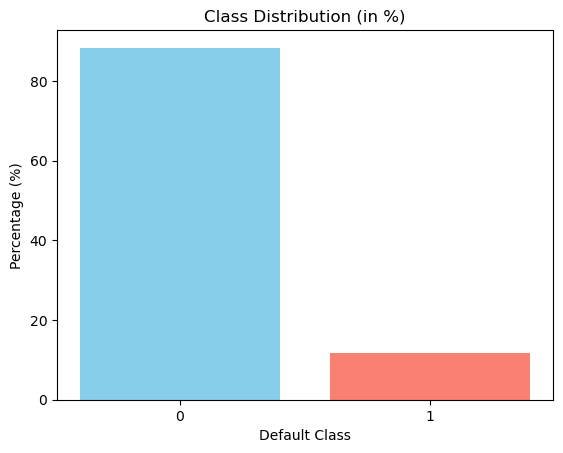

In [15]:
value_perc = dfnew['Default'].value_counts(normalize=True) * 100
labels = value_perc.index.astype(str)
percentages = value_perc.values
plt.bar(labels, percentages, color=['skyblue', 'salmon'])
plt.xlabel('Default Class')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution (in %)')
plt.show()

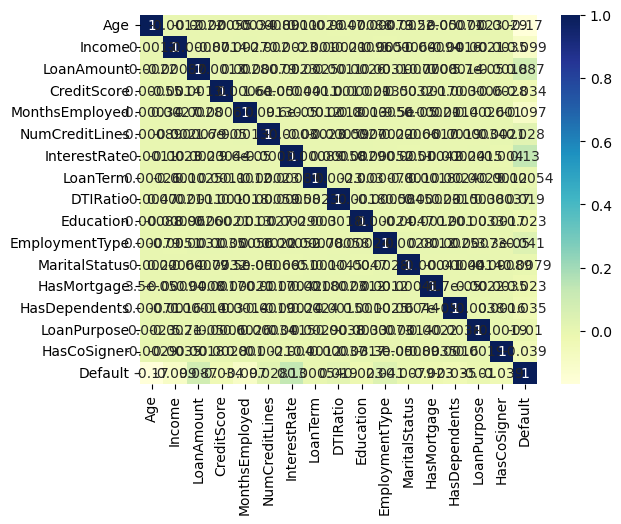

In [16]:
correlation=dfnew.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

In [17]:
##Class imbalance is seen above thus we use smote/oversampling/undersampling
from sklearn.preprocessing import StandardScaler
array=dfnew.values
x=array[:,:16]
y=array[:,16]
scaler=StandardScaler().fit(x)
rescaledX=scaler.transform(x)

In [18]:
##Test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(204277, 16) (51070, 16) (204277,) (51070,)


In [19]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [20]:
print(X_train_resampled.shape, y_train_resampled.shape)

(206734, 16) (206734,)


C:\Users\Lokesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.676091638926963
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     45170
         1.0       0.21      0.67      0.32      5900

    accuracy                           0.68     51070
   macro avg       0.58      0.67      0.55     51070
weighted avg       0.86      0.68      0.73     51070


ROC–AUC Score: 0.6718227749781429


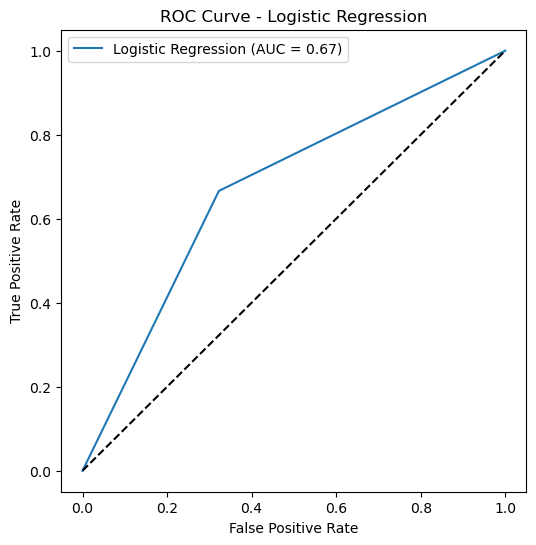

In [37]:
##LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,accuracy_score, roc_auc_score, roc_curve
logistic=LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)
logistic.fit(X_train_resampled, y_train_resampled)
y_pred_lg=logistic.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_lg)
print(accuracy)
print(classification_report(y_test, y_pred_lg))
roc_auc = roc_auc_score(y_test, y_pred_lg)
print("\nROC–AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

0.8702369297043274
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45170
         1.0       0.70      0.03      0.05      5900

    accuracy                           0.89     51070
   macro avg       0.80      0.51      0.50     51070
weighted avg       0.87      0.89      0.84     51070


ROC–AUC Score: 0.5134513682772802


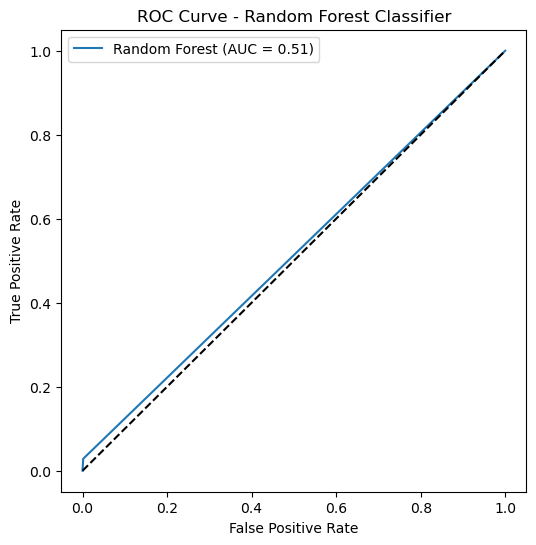

In [28]:
##RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,accuracy_score, roc_auc_score, roc_curve
rf_classifier = RandomForestClassifier(class_weight='balanced',n_estimators=200, random_state=42)
rf_classifier.fit(X_train_resampled,y_train_resampled )
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC–AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.show()

C:\Users\Lokesh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.8687096142549442
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     45170
         1.0       0.38      0.22      0.28      5900

    accuracy                           0.87     51070
   macro avg       0.64      0.59      0.60     51070
weighted avg       0.84      0.87      0.85     51070


ROC–AUC Score: 0.586131863431181


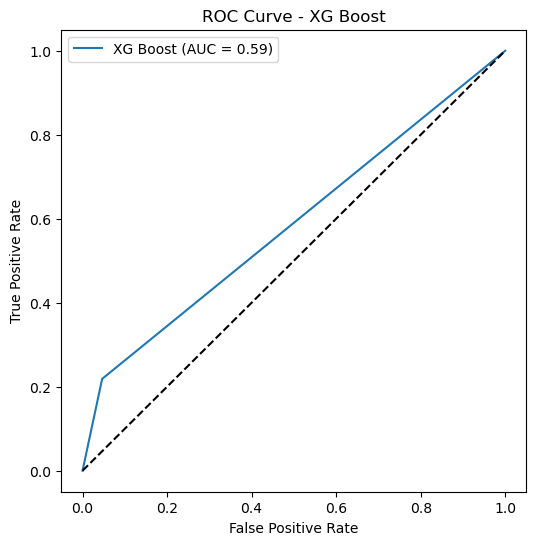

In [30]:
##XGBOOST METHOD
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve
xgb_model = XGBClassifier(use_label_encoder=False,eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled,y_train_resampled)
y_xgb_pred=xgb_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_xgb_pred)
print(accuracy2)
print(classification_report(y_test, y_xgb_pred))
roc_auc = roc_auc_score(y_test, y_xgb_pred)
print("\nROC–AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_pred)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'XG Boost (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XG Boost")
plt.legend()
plt.show()

0.7906990405326023
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     45170
         1.0       0.28      0.50      0.36      5900

    accuracy                           0.79     51070
   macro avg       0.60      0.66      0.62     51070
weighted avg       0.85      0.79      0.82     51070


ROC–AUC Score: 0.6646294413196099


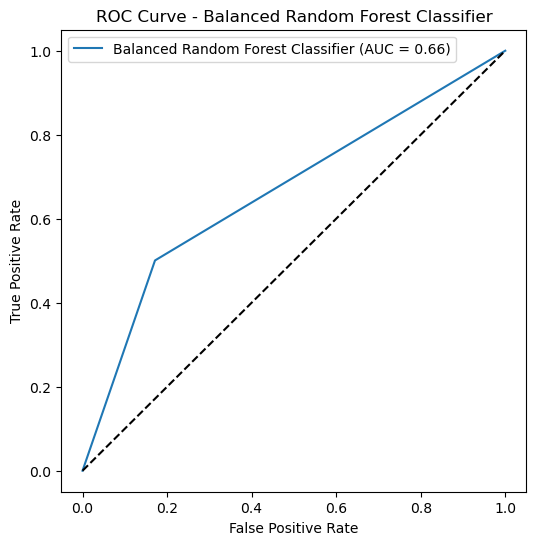

In [31]:
##BALANCED RANDOM FOREST CLASSIFIER
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
print(accuracy_score(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))
roc_auc = roc_auc_score(y_test, y_pred_brf)
print("\nROC–AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_brf)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Balanced Random Forest Classifier (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Random Forest Classifier")
plt.legend()
plt.show()

Accuracy: 0.6788917172508322
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     45170
         1.0       0.22      0.69      0.33      5900

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070


ROC–AUC Score: 0.6857833307692596


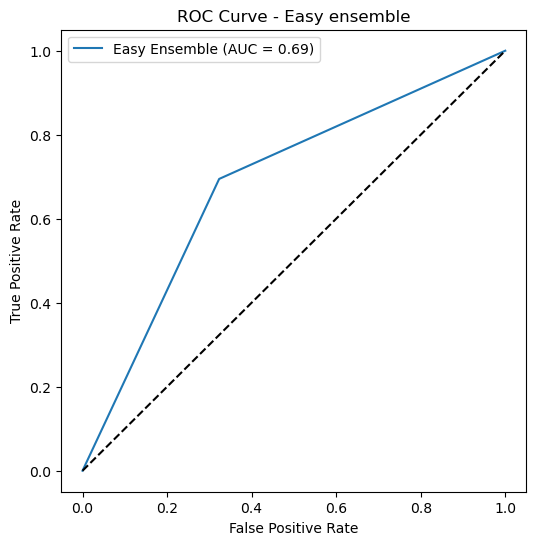

In [32]:
##EASY ENSEAMBLE CLASSIFIER
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, roc_curve
ee_model = EasyEnsembleClassifier(n_estimators=10, random_state=42)  # You can tune n_estimators
ee_model.fit(X_train, y_train)
y_pred_ee = ee_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_ee))
print(classification_report(y_test, y_pred_ee))
roc_auc = roc_auc_score(y_test, y_pred_ee)
print("\nROC–AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ee)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Easy Ensemble (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Easy ensemble")
plt.legend()
plt.show()